In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()


Library,Version
OS,posix [linux]
Python,"3.5.2+ (default, Sep 22 2016, 12:18:14) [GCC 6.2.0 20160927]"
IPython,5.3.0
MatPlotLib,2.0.0
Numpy,1.12.0
pyAgrum,0.11.1.9


In [3]:
bn=gum.loadBN("res/alarm.dsl")
gnb.showBN(bn,size='10')

Visualisation and inspection
============================

In [4]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [5]:
print(bn.cpt(bn.idFromName('SHUNT')))

<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:NORMAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:NORMAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.1 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ESOPHAGEAL> :: 0.9 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.95 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ESOPHAGEAL> :: 0.05 /<SHUNT:NORMAL|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.01 /<SHUNT:HIGH|PULMEMBOLUS:TRUE|INTUBATION:ONESIDED> :: 0.99 /<SHUNT:NORMAL|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.05 /<SHUNT:HIGH|PULMEMBOLUS:FALSE|INTUBATION:ONESIDED> :: 0.95


In [6]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

Results of inference
====================

It is easy to look at result of inference

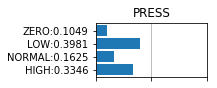

In [7]:
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

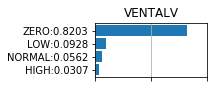

In [8]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

Overall results

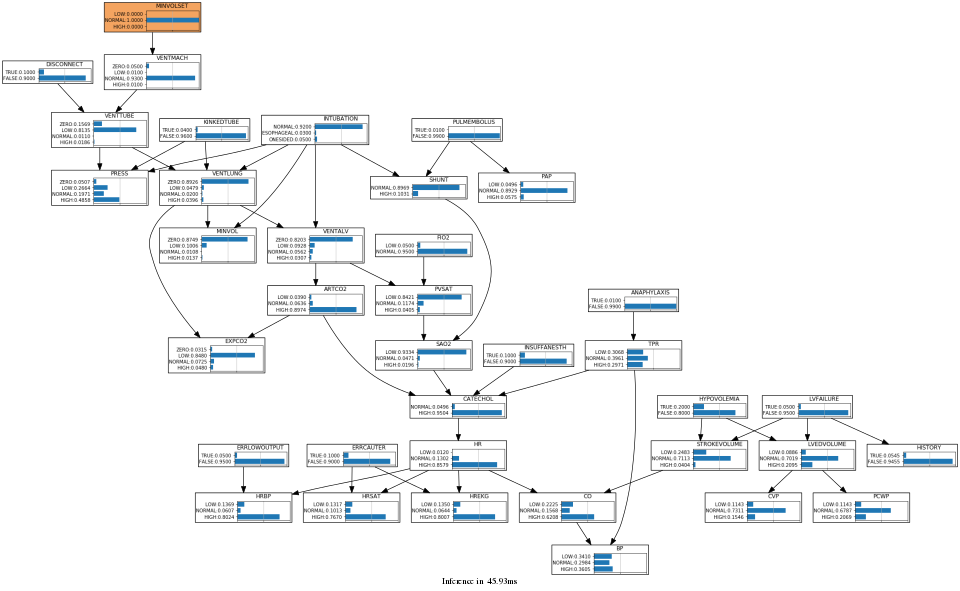

In [9]:
gnb.showInference(bn,size="10",evs={'MINVOLSET':'NORMAL'})

What is the impact of observed variables (SHUNT and VENTALV for instance) on another on (PRESS) ?

In [10]:
ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

<pyAgrum.pyAgrum.Potential_double; proxy of <Swig Object of type 'gum::Potential< double > *' at 0x7fddc81f9c30> >

Using inference as a function
====================

It is also easy to use inference as a routine in more complex procedures.

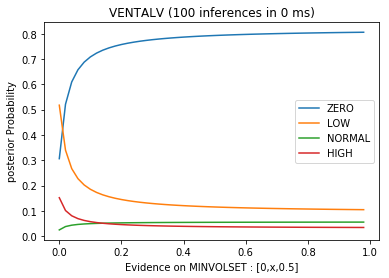

In [11]:
import time

r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist() 
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i) 
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

Another example : python gives access to a large set of tools. Here the value for the equality of two probabilities of a posterior is easely computed.

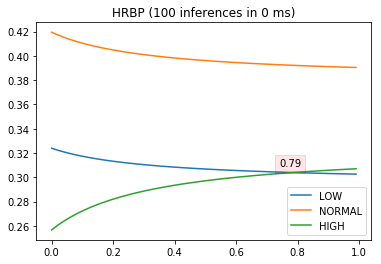

In [12]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist() 
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[0]>transpose(y)[2]).argmin()
text(x[np1]-0.05,y[np1][0]+0.005,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

BN as a classifier
================

Generation of databases
-----------------------

Using the CSV format for the database:

In [16]:
from pyAgrum.lib.bn2csv import generateCSV

generateCSV(bn,"out/test.csv",1000,True)

 out/test.csv : [ ############################################################ ] 100%ut/test.csv : [ ##############################################               ] 77%
Log2-Likelihood : -15442.57129267926



-15442.57129267926

In [17]:
from pyAgrum.lib._utils import oslike
oslike.head('out/test.csv')

ANAPHYLAXIS,TPR,DISCONNECT,LVFAILURE,HISTORY,FIO2,ERRCAUTER,ERRLOWOUTPUT,INSUFFANESTH,PULMEMBOLUS,PAP,MINVOLSET,VENTMACH,VENTTUBE,INTUBATION,SHUNT,HYPOVOLEMIA,STROKEVOLUME,LVEDVOLUME,PCWP,CVP,KINKEDTUBE,VENTLUNG,MINVOL,VENTALV,ARTCO2,EXPCO2,PVSAT,SAO2,CATECHOL,HR,CO,BP,HRSAT,HREKG,HRBP,PRESS
1,2,1,1,1,1,1,1,1,1,1,1,2,1,0,1,1,1,1,1,1,1,0,0,0,2,1,1,2,1,2,2,2,2,2,2,2
1,1,0,1,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1
1,2,0,1,1,1,0,1,1,1,1,1,2,0,0,0,1,1,2,2,2,1,1,1,1,2,2,1,0,1,2,2,2,1,0,2,1
1,0,1,1,1,1,1,1,1,1,1,1,2,1,0,0,1,1,2,2,2,1,0,0,0,2,1,0,0,1,2,2,1,2,2,2,1
1,0,1,1,1,1,1,1,1,1,1,1,2,2,0,0,1,1,1,1,1,1,2,1,3,0,2,2,1,1,2,2,0,2,2,1,3
1,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,1,1,1,1,1,1,0,0,0,2,1,0,0,1,2,2,2,2,2,2,3
1,1,1,1,1,1,1,1,0,1,1,1,2,1,0,0,1,0,1,1,1,1,0,0,0,2,1,0,0,1,2,0,0,2,1,2,3
1,1,1,1,1,1,1,0,0,1,0,1,2,1,1,0,1,0,1,1,1,1,1,1,1,2,2,1,0,1,1,0,1,0,1,2,1
1,1,1,1,1,1,1,0,1,1,1,1,2,1,0,0,0,1,1,1,1,1,0,0,0,2,1,0,0,1,2,2,1,2,2,1,3



BN as a classifier
------------------

(because of the use of from-bn-generated csv files, quite good ROC curves are expected)

 out/test.csv : [ ############################################################ ] 100%

FileNotFoundError: [Errno 2] No such file or directory: 'roc_alarm.dsl-out/test.csv-CATECHOL-HIGH.png'

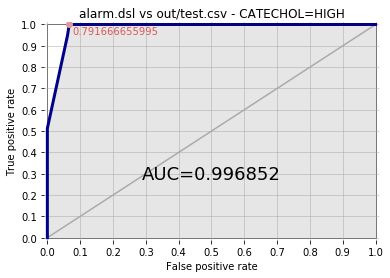

In [18]:
from pyAgrum.lib.bn2roc import showROC
showROC(bn,"out/test.csv",
        variable='CATECHOL',label='HIGH',  # class and label 
        visible=True,show_fig=True)        

Using another class variable

In [ ]:
showROC(bn,"out/test.csv",'SAO2','HIGH',True,True)

# Fast prototyping for BNs

In [ ]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

In [ ]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))

# Joint posterior, impact of multiple evidence

In [ ]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [ ]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","g"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [ ]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [ ]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )